<h1 p align='center'>Previsão de variáveis alvo contínuas com a Análise de Regressão</h1>
<p align='center'><img src=https://cdn.lynda.com/course/2848256/2848256-1608664963973-16x9.jpg width = 500></p>

Modelos de regressão são usados para prever variáveis alvo em escala contínua, o que os torna atraentes para abordar muitas questões da ciência. Eles também têm aplicações na indústria, como entender as relações entre variáveis, avaliar tendências ou fazer previsões. Um exemplo é prever as vendas de uma empresa nos próximos meses.

\begin{align*}
y = x_{0} + w_{1}x
\end{align*}

Aqui, o peso, $\small w_{0}$, representa a interseção do eixo $\small y$ e $\small w_{1}$ é o coeficiente de peso da variável explicativa. Nosso objetivo é aprender os pesos da equação linear para descrever a relação entre a variável explicativa e a variável alvo, que pode então ser usada para prever as respostas de novas variáveis explicativas que não faziam parte do conjunto de dados de treinamento.

Com base na equação linear que definimos anteriormente, a regressão linear pode ser entendida como encontrar a linha reta de melhor ajuste por meio dos exemplos de treinamento, conforme mostrado na figura a seguir:

<p align='center'><img src=https://vitalflux.com/wp-content/uploads/2022/02/simple-linear-regression-line.jpg></p>

Essa linha de melhor ajuste também é chamada de **linha de regressão**, e as linhas verticais da linha de regressão para os exemplos de treinamento são os chamados deslocamentos ou resíduos – os erros de nossa previsão.

### Regressão linear múltipla

Acima foi introduzida a regressão linear simples, um caso especial de regressão linear com uma variável explicativa. Claro, também podemos generalizar o modelo de regressão linear para múltiplas variáveis explicativas; esse processo é chamado de regressão linear múltipla:
\begin{align*}
y = x_{0}w_{0} + w_{1}x_{1} + ... w_{m}x_{m} = \sum^{n}_{i=0}w_{i}x_{i} = w^Tx
\end{align*}

<img src=https://datacadamia.com/_media/data_mining/multiple_regression_representation_hyperplane.jpg? width='500'>

Figura 1: Hiperplano com duas *features*

Como podemos ver, as visualizações de múltiplos hiperplanos de regressão linear em um gráfico de dispersão tridimensional já são difíceis de interpretar ao olhar para figuras estáticas. Como não temos bons meios de visualizar hiperplanos com duas dimensões em um gráfico de dispersão (múltiplos modelos de regressão linear ajustados a conjuntos de dados com três ou mais recursos), os exemplos e visualizações se concentrarão, principalmente, no caso univariado, usando regressão linear simples. No entanto, as regressões lineares simples e múltiplas são baseadas nos mesmos conceitos e nas mesmas técnicas de avaliação; as implementações de código que discutiremos também são compatíveis com os dois tipos de modelo de regressão.

### Carregando o conjunto de dados de Habitação em um *DataFrame*

In [44]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Visualizando as características importantes de um conjunto de dados

A análise exploratória de dados (*EDA*) é uma primeira etapa importante e recomendada antes do treinamento de um modelo de aprendizado de máquina. Usaremos algumas técnicas simples, porém úteis, da caixa de ferramentas gráfica *EDA* que podem nos ajudar a detectar visualmente a presença de *outliers*, a distribuição dos dados e os relacionamentos entre os recursos.
Primeiro, criaremos uma matriz de gráfico de dispersão que nos permitirá visualizar as correlações em pares entre os diferentes recursos desse conjunto de dados em um só lugar. Para plotar a matriz de gráfico de dispersão, usaremos a função `scatterplotmatrix` da biblioteca *Mlxtend*, que é uma biblioteca *Python* que contém várias funções de conveniência para aplicativos de aprendizado de máquina e ciência de dados em *Python*.

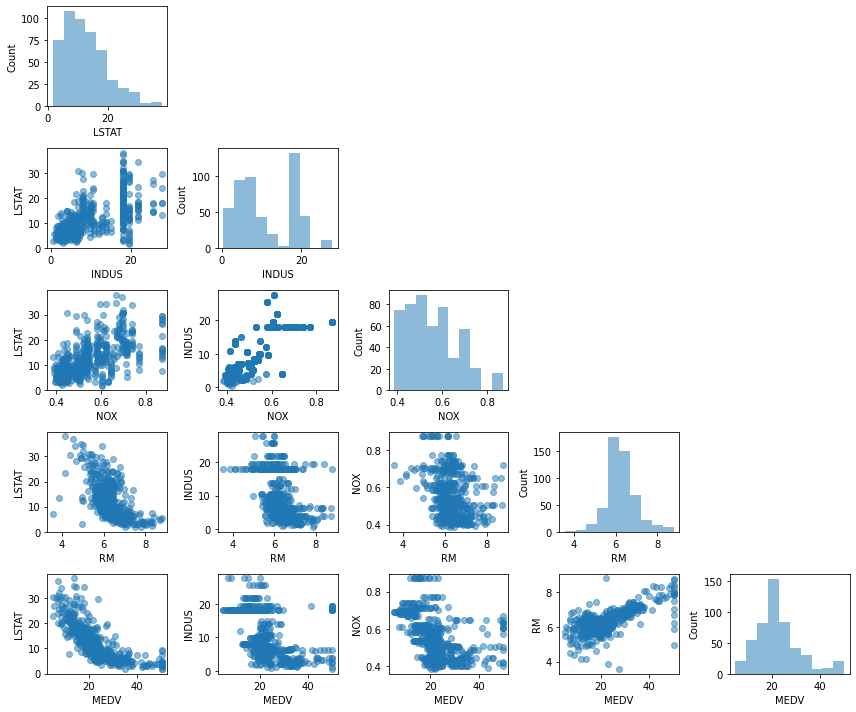

In [45]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix # Usando a Mlxtend para plotagem dos Gráficos

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']


scatterplotmatrix(df[cols].values, figsize=(12, 10), 
                  names=cols, alpha=0.5)

plt.tight_layout()

plt.show()


Para não deixar muito poluído o espaço, plotamos apenas **cinco colunas** do conjunto de dados: *LSTAT, INDUS, NOX, RM e MEDV*. No entanto, é interessante criar uma matriz de gráfico de dispersão de todo o *DataFrame* para explorar ainda mais o conjunto de dados escolhendo nomes de coluna diferentes na chamada de função de matriz de dispersão anterior ou incluindo todas as variáveis na matriz de gráfico de dispersão omitindo o seletor de coluna.

Usando essa matriz de gráfico de dispersão, agora podemos observar rapidamente como os dados são distribuídos e se eles contêm valores discrepantes. Por exemplo, podemos ver que existe uma relação linear entre o *RM* e os preços das casas, *MEDV* (a quinta linha da quarta coluna). Além disso, podemos ver no histograma - o subtrama inferior direito na matriz do gráfico de dispersão - que a variável *MEDV* parece ser normalmente distribuída, mas contém vários valores discrepantes.

<blockquote>
<h5>Suposição de normalidade da regressão linear</h5>
<p align='justify'>Observe que, ao contrário da crença comum, treinar um modelo de regressão linear não requer que as variáveis explicativas ou alvo sejam normalmente distribuídas. A suposição de normalidade é apenas um requisito para certas estatísticas e testes de hipóteses (para obter mais informações sobre este tópico, consulte Introdução à Análise de Regressão Linear, Montgomery, Douglas C. Montgomery, Elizabeth A. Peck, e G. Geoffrey Vining, Wiley, 2012, páginas: 318-319).</p>
</blockquote>

### Olhando para os relacionamentos usando uma matriz de correlação
Visualizamos anteriomente as distribuições de dados das variáveis ​​do conjunto de dados de Habitação na forma de histogramas e gráficos de dispersão. Em seguida, criaremos **uma matriz de correlação** para quantificar e resumir as relações lineares entre as variáveis. Uma matriz de correlação está intimamente relacionada à matriz de covariância quando aplicamos a redução de dimensionalidade não supervisionada por meio da Análise de Componentes Principais. Podemos interpretar a matriz de correlação como sendo uma versão redimensionada da matriz de covariância. De fato, a matriz de correlação é idêntica a uma matriz de covariância calculada a partir de características padronizadas.

A matriz de correlação é uma matriz quadrada que contém o coeficiente de correlação produto-momento de *Pearson* (geralmente abreviado como $\small  r$ de *Pearson*), que mede a dependência linear entre pares de recursos. Os coeficientes de correlação estão na faixa de –1 a 1. Duas características têm uma correlação positiva perfeita se $\small  r$ = 1, nenhuma correlação se $\small r$ = 0 e uma correlação negativa perfeita se $\small  r$ = –1. Como mencionado anteriormente, o coeficiente de correlação de *Pearson* pode ser simplesmente calculado como a covariância entre duas características, $\small  x$ e $\small  y$ (numerador), dividida pelo produto de seus desvios padrão (denominador):

\begin{align*}
r = \dfrac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}
\end{align*} 

Como você pode ver na figura abaixo, a matriz de correlação nos fornece outro gráfico de resumo útil que pode nos ajudar a selecionar recursos com base em suas respectivas correlações lineares:

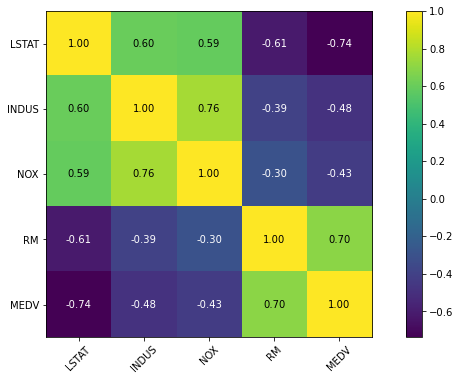

In [46]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols, figsize=(12,6))
plt.show()

Para ajustar um modelo de regressão linear, estamos interessados naqueles recursos que têm **uma alta correlação com nossa variável alvo**, *MEDV*. Observando a matriz de correlação anterior, podemos ver que nossa variável alvo, *MEDV*, apresenta a maior correlação com a *variável LSTAT (-0,74)*; no entanto, ao inspecionar a matriz do gráfico de dispersão, há uma relação não linear clara entre *LSTAT* e *MEDV*.

Por outro lado, a correlação entre *RM* e *MEDV* também é relativamente **alta (0,70)**. Dada a relação linear entre essas duas variáveis que observamos no gráfico de dispersão, *RM* parece ser uma boa escolha como variável exploratória para introduzir os conceitos de um modelo de regressão linear simples.

### Implementando um modelo de regressão linear de mínimos quadrados comum
Mencionamos que a regressão linear pode ser entendida como a obtenção da linha reta de melhor ajuste através dos exemplos de nossos dados de treinamento. No entanto, não definimos o termo melhor ajuste nem discutimos as diferentes técnicas de ajuste de tal modelo. Agora, nesta oportunidade, preencheremos as peças que faltam neste quebra-cabeça usando o método dos mínimos quadrados ordinários (OLS) (às vezes também chamado de **mínimos quadrados lineares**) para estimar os parâmetros da linha de regressão linear que minimiza a soma das distâncias verticais quadradas (resíduos ou erros) aos exemplos de treinamento.

### Resolvendo a regressão para parâmetros de regressão com *Gradient Descent*
Considere a implementação do Neurônio Linear Adaptativo (*Adaline*), em que o neurônio artificial utiliza uma função de ativação linear. Além disso, definimos uma função de custo, $\small  J(w)$, que minimizamos para aprender os pesos por meio de algoritmos de otimização, como *Gradient Descent* (GD) e *Gradient Descent* estocástico (SGD).
Esta função de custo em *Adaline* é a soma dos erros ao quadrado (SSE), que é idêntica à função de custo que usamos para OLS:

$$
\text{$J(w) = \dfrac{1}{2} \sum^{n}_{i=1}(y^{(i)} -\hat{y}^{(i)})^{2} \quad \:onde \: \hat{y} \:$ é o valor predito $\: \hat{y} = w^Tx$}
$$



Iteration: 20/20 | Cost 130.67 | Elapsed: 0:00:00 | ETA: 0:00:000

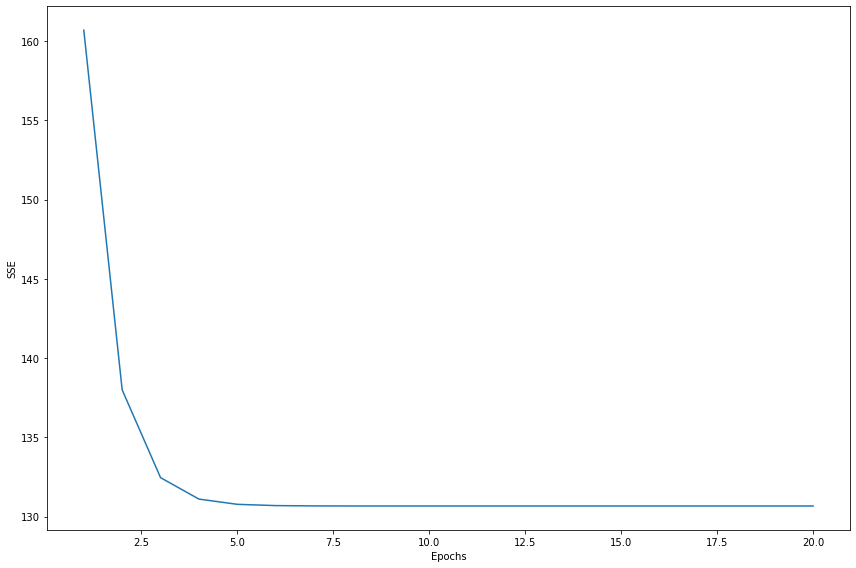

In [47]:
X = df[['RM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()


from mlxtend.regressor import LinearRegression
lr = LinearRegression(method= 'sgd', eta=0.001, epochs=20, print_progress=3, minibatches=1)
lr.fit(X_std,y_std)


plt.figure(figsize=(12,8))
plt.plot(range(1, lr.epochs+1), lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.tight_layout()
plt.show()    

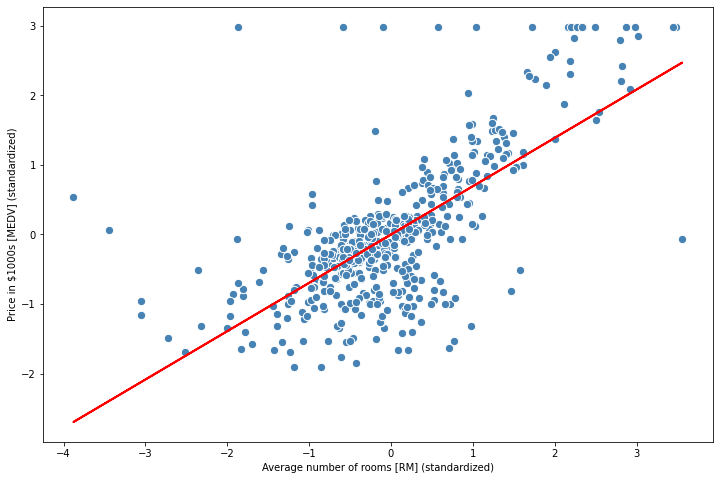

In [48]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='red', lw=2)    
    return 

plt.figure(figsize=(12,8))
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

Embora esta observação faça sentido, os dados também nos dizem que o número de quartos não explica muito bem os preços das casas em muitos casos. Mais adiante, discutiremos como quantificar o desempenho de um modelo de regressão. Curiosamente, também podemos observar que vários pontos de dados se alinharam em $\small  y$ = 3, **o que sugere que os preços podem ter sido cortados**. Em certas aplicações, também pode ser importante relatar as variáveis de resultado previstas em sua escala original. Para dimensionar o resultado do preço previsto de volta ao eixo *Price in $1000s*, podemos simplesmente aplicar o método `inverse_transform` do *StandardScaler*:

In [49]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" %  sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


Neste exemplo de código, usamos o modelo de regressão linear previamente treinado para prever o preço de uma casa com **cinco** cômodos. De acordo com nosso modelo, tal casa valerá $10.840.

Vale a pena mencionar que tecnicamente não precisamos atualizar os pesos do *intercept* se estivermos trabalhando com variáveis padronizadas, pois o *intercept* do eixo $\small  y$ é sempre 0 nesses casos. Podemos confirmar isso rapidamente imprimindo os pesos:

In [50]:
print('Slope: %.3f' % lr.w_[0])

Slope: 0.695


### Estimando o coeficiente de um modelo de regressão via *scikit-learn*

Implementamos um modelo de trabalho para análise de regressão; no entanto, em uma aplicação do mundo real, podemos estar interessados em implementações mais eficientes. Por exemplo, muitos dos estimadores do *scikit-learn* para regressão fazem uso da implementação de mínimos quadrados no *SciPy* (`scipy.linalg.lstsq`), que por sua vez usa otimizações de código altamente otimizadas baseadas no *Linear Algebra Package* (LAPACK). A implementação de regressão linear no *scikit-learn* também funciona (melhor) com variáveis não padronizadas, pois não usa otimização baseada em SGD, então podemos pular a etapa de padronização:

In [51]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


Como você pode ver ao executar este código, o modelo *LinearRegression* do *scikit-learn*, ajustado com as variáveis **RM** e **MEDV** não padronizadas, produziu coeficientes de modelo diferentes, uma vez que os recursos não foram padronizados. No entanto, quando comparamos com nossa implementação GD plotando **MEDV** contra **RM**, podemos ver qualitativamente que ele se ajusta aos dados da mesma forma.

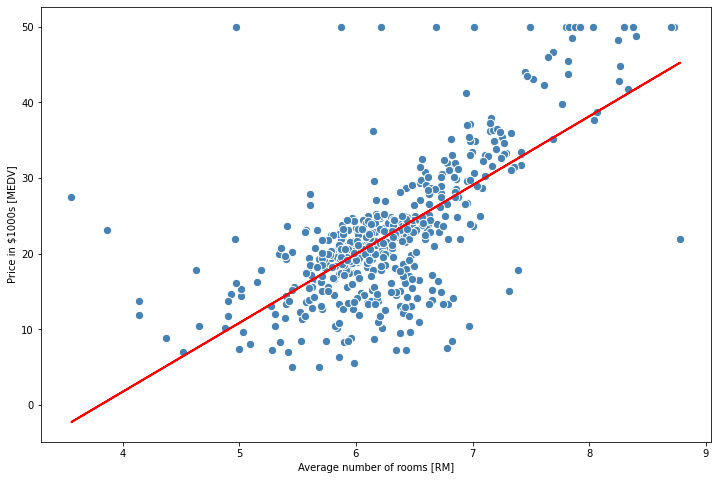

In [52]:
plt.figure(figsize=(12,8))
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

### Ajustando um modelo de regressão robusto usando RANSAC

Modelos de regressão linear podem ser fortemente impactados pela presença de *outliers*. Em certas situações, um subconjunto muito pequeno de nossos dados pode ter um grande efeito nos coeficientes estimados do modelo. Existem muitos testes estatísticos que podem ser usados ​​para detectar discrepâncias, que não serão abordadas neste momento. No entanto, remover *outliers* sempre requer nosso próprio julgamento como cientistas de dados, bem como nosso conhecimento de domínio.
Como alternativa para eliminar *outliers*, veremos um método robusto de regressão usando o algoritmo *RANdom SAmple Consensus (RANSAC)*, que ajusta um modelo de regressão a um subconjunto dos dados, os chamados *inliers*.
Podemos resumir o algoritmo iterativo *RANSAC* da seguinte forma:
1. Selecione um número aleatório de exemplos para serem *inliers* e ajuste o modelo.
2. Teste todos os outros pontos de dados em relação ao modelo ajustado e adicione os pontos que estão dentro de uma tolerância dada pelo usuário aos *inliers*.
3. Reinstale o modelo usando todos os *inliers*.
4. Estime o erro do modelo ajustado versus os *inliers*.
5. Encerre o algoritmo se o desempenho atingir um determinado limite definido pelo usuário ou se um número fixo de iterações for atingido; volte ao passo 1 caso contrário.

Vamos agora usar um modelo linear em combinação com o algoritmo *RANSAC* implementado na classe `RANSACRegressor` do *scikit-learn*:

In [53]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100,         # Define o máximo de interações: 100
                         min_samples=50,         # Define o mínimo de exemplos de treinamento escolhidos aleatoriamente.
                         loss='absolute_loss',   # Calcula distâncias verticais absolutas entre a linha ajustada e os exemplos de treinamento.
                         residual_threshold=5.0, # Só permitimos que exemplos de treinamento sejam incluídos no conjunto interno se sua distância vertical 
                                                 # à linha ajustada estiver dentro de 5 unidades de distância.
                         
                         random_state=0)

ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

Por padrão, o *scikit-learn* usa a estimativa *MAD* para selecionar o limiar *inlier*, onde *MAD* representa o desvio absoluto mediano dos valores alvo, $y$. No entanto, a escolha de um valor apropriado para o limiar *inlier* é específico do problema, o que é uma desvantagem do *RANSAC*. Muitas abordagens diferentes foram desenvolvidas nos últimos anos para selecionar automaticamente um bom limiar interno. Uma vez que ajustamos o modelo *RANSAC*, vamos obter os *inliers* e *outliers* do modelo de regressão linear *RANSAC* ajustado e plotá-los junto com o ajuste linear:

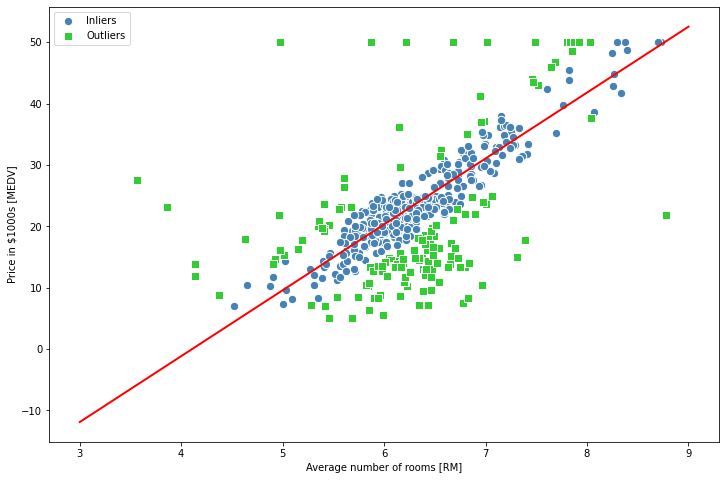

In [54]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers',s=70 )
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers', s=70 )
            
plt.plot(line_X, line_y_ransac, color='red', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

Quando imprimimos a inclinação e a interceptação do modelo executando o seguinte código, a linha de regressão linear será ligeiramente diferente do ajuste que obtivemos anteriomente sem usar *RANSAC*:

In [55]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


Usando o *RANSAC*, reduzimos o efeito potencial dos *outliers* neste conjunto de dados, mas não sabemos se essa abordagem terá um efeito positivo no desempenho preditivo para dados não vistos ou não. Assim, veremos diferentes abordagens para avaliar um modelo de regressão, que é uma parte crucial da construção de sistemas para modelagem preditiva.

### Avaliando o desempenho de modelos de regressão linear
Na seção anterior, você aprendeu como ajustar um modelo de regressão em dados de treinamento. No entanto, sabemos que é crucial testar o modelo em dados que não foram vistos durante o treinamento para obter uma estimativa mais imparcial de seu desempenho de generalização.

Queremos dividir nosso conjunto de dados em conjuntos de dados de treinamento e teste separados, onde usaremos o primeiro para ajustar o modelo e o último para avaliar seu desempenho em dados não vistos para estimar o desempenho da generalização. Em vez de prosseguir com o modelo de regressão simples, agora usaremos todas as variáveis no conjunto de dados e treinaremos um modelo de regressão múltipla:

In [56]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# Instanciando o algoritmo
slr = LinearRegression()

# Treinando o modelo
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Como nosso modelo usa múltiplas variáveis explicativas, <u>não podemos visualizar a linha de regressão linear (ou hiperplano, para ser preciso)</u> em um gráfico bidimensional, mas podemos plotar os resíduos (as diferenças ou distâncias verticais entre os valores reais e previstos) versus os valores previstos para diagnosticar nosso modelo de regressão.

Os gráficos residuais são uma ferramenta gráfica comumente usada para diagnosticar modelos de regressão. Eles podem ajudar a detectar não linearidade e *outliers* e verificar se os erros são distribuídos aleatoriamente.
Usando o código a seguir, agora vamos traçar um gráfico de resíduos onde simplesmente subtraímos as verdadeiras variáveis de destino de nossas respostas previstas:

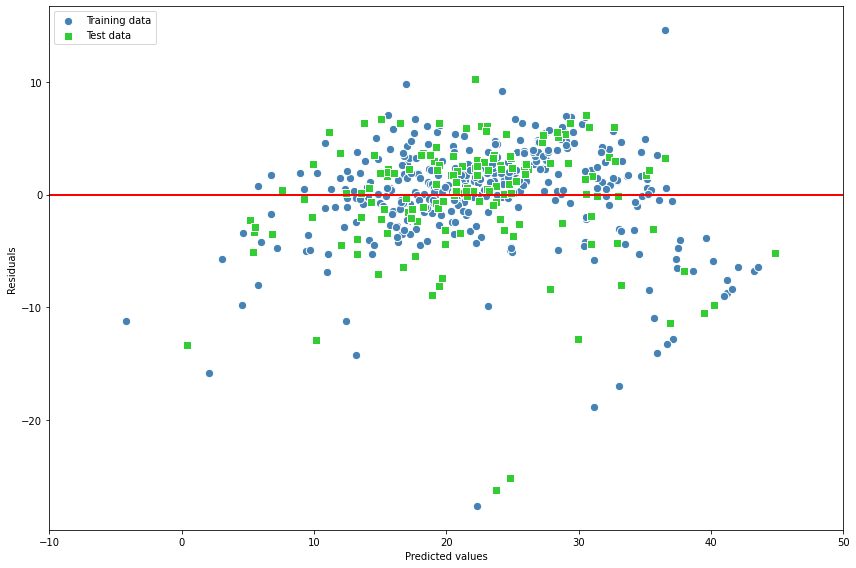

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data', s= 70)
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data', s= 70)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='red', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from IPython.display import display, Latex
display(Latex(f"$\small  MSE \: train$: {mean_squared_error(y_train, y_train_pred):.3f}% $ \small \quad -  \quad test$: {mean_squared_error(y_test, y_test_pred):.3f}%"))  

<IPython.core.display.Latex object>

Você pode ver que o *MSE* no conjunto de dados de treinamento é **19,96** e o *​​MSE* no conjunto de dados de teste é muito maior, com um valor de **27,20**, que é um indicador de que nosso modelo está <u>superajustando os dados de treinamento nesse caso</u>.

No entanto, esteja ciente de que o *MSE* é ilimitado em contraste com a precisão da classificação, por exemplo. Em outras palavras, a interpretação do *MSE* depende do conjunto de dados e do dimensionamento de recursos. Por exemplo, se os preços das casas fossem apresentados como múltiplos de 1.000 (com o sufixo K), o mesmo modelo produziria um *MSE* menor em comparação com um modelo que trabalhasse com recursos não dimensionados. Para ilustrar melhor este ponto:

$$
\small  \text{$(\$10K − \$15K)^2 $\quad<\quad$ (\$10.000 − \$15.000)^2$}
$$

Assim, às vezes pode ser mais útil relatar o coeficiente de determinação ($\small  R^{2}$ ), que pode ser entendido como uma versão padronizada do *MSE*, para melhor interpretabilidade do desempenho do modelo. Ou, em outras palavras, $\small  R^{2}$ é a fração da variância da resposta que é capturada pelo modelo. O valor de $\small R^{2}$ é definido como:
\begin{align*}
R^{2} = 1 - \dfrac{SSE}{SST}
\end{align*} 



In [59]:
display(Latex(f"$R^2 \: train$: {r2_score(y_train, y_train_pred):.3f}%  $\quad -  \qquad test$: {r2_score(y_test, y_test_pred):.3f}%")) 

<IPython.core.display.Latex object>

### Usando métodos regularizados para regressão
A regularização é uma abordagem para lidar com o problema de *overfitting* adicionando informações adicionais e, assim, reduzindo os valores dos parâmetros do modelo para induzir uma penalidade contra a complexidade. As abordagens mais populares para regressão linear regularizada são a chamada *Ridge Regression*, *least absolute shrinkage and selection operator* (LASSO) e a *elastic Net*.

**Ridge Regression** é um modelo $L2$ penalizado em que simplesmente adicionamos a soma quadrada dos pesos à nossa função de custo de mínimos quadrados:

\begin{align*}
j(w)_{Ridge} = \sum^{n}_{i=1}(y^{(i)} - \hat{y}^{(i)})^{2} + \lambda\left \| w \right \|^{2}_{2}
\end{align*} 
Aqui:
\begin{align*}
L2: \lambda\left \| w \right \|^{2}_{2} = \lambda\sum^{m}_{j=1}w_{j}\!^{2}
\end{align*} 

Ao aumentar o valor do hiperparâmetro $\lambda$ , aumentamos a força de regularização e, assim, encolhemos os pesos do nosso modelo. Observe que não regularizamos o termo de interceptação, $w_{0}$.

Uma abordagem alternativa que pode levar a modelos esparsos é o *LASSO*. Dependendo da força de regularização, certos pesos podem se tornar zero, o que também torna o *LASSO* útil como uma técnica de seleção de recursos supervisionada:

\begin{align*}
j(w)_{LASSO} = \sum^{n}_{i=1}(y^{(i)} - \hat{y}^{(i)})^{2} + \lambda\left \| w \right \|_{1}
\end{align*} 

Aqui, a penalidade *L1* para *LASSO* é definida como a soma das magnitudes absolutas dos pesos do modelo, como segue:
\begin{align*}
L1: \lambda\left \| w \right \|_{1} = \lambda\sum^{m}_{j=1}\left |w_{j}\right|
\end{align*} 

No entanto, uma limitação do *LASSO* é que ele seleciona no máximo *n* recursos se *m > n*, onde *n* é o número de exemplos de treinamento. Isso pode ser indesejável em certas aplicações de seleção de recursos. Na prática, no entanto, esta propriedade do *LASSO* é muitas vezes uma vantagem porque evita modelos saturados. A saturação de um modelo ocorre se o número de exemplos de treinamento for igual ao número de recursos, o que é uma forma de sobreparametrização. Como consequência, um modelo saturado sempre pode ajustar os dados de treinamento perfeitamente, mas é apenas uma forma de interpolação e, portanto, não se espera que generalize bem.

Um compromisso entre *Ridge Regression* e *LASSO* é a *Elastic Net*, que tem uma penalidade *L1* para gerar esparsidade e uma penalidade *L2* tal que pode ser usada para selecionar mais de *n* características se *m > n*:

\begin{align*}
j(w)_{ElasticNet} = \sum^{n}_{i=1}(y^{(i)} - \hat{y}^{(i)})^{2}  + \lambda_{1}\sum^{m}_{j=1}w_{j}\!^{2}  +  \lambda_{2}\sum^{m}_{j=1}\left |w_{j}\right|
\end{align*} 

Esses modelos de regressão regularizados estão todos disponíveis via *scikit-learn*, e seu uso é semelhante ao modelo de regressão regular, exceto que temos que especificar a força de regularização por meio do parâmetro $ \small  \lambda$, por exemplo, otimizado por meio de validação cruzada *k-fold*.

Um modelo *Ridge Regression* pode ser inicializado por meio de:

In [60]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

Observe que a força de regularização é regulada pelo parâmetro *alpha*, que é semelhante ao parâmetro $\small  \lambda$. Da mesma forma, podemos inicializar um regressor *LASSO* do submódulo *linear_model*:

In [61]:
from sklearn.linear_model import Lasso
ridge = Lasso(alpha=1.0)

Por fim, a implementação do *ElasticNet* nos permite variar a proporção *L1* para *L2*:

In [62]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

Por exemplo, se definirmos o `l1_ratio` como 1.0, o regressor do *ElasticNet* será igual à regressão *LASSO*. Para obter informações mais detalhadas sobre as diferentes implementações de regressão linear, consulte a documentação em http://scikit-learn.org/stable/modules/linear_model.html.

### Transformando um modelo de regressão linear em uma curva – regressão polinomial
Nas seções anteriores, assumimos uma relação linear entre as variáveis explicativas e de resposta. Uma maneira de explicar a violação da suposição de linearidade é usar um modelo de regressão polinomial adicionando termos polinomiais:

$$
y = w_{0} + w_{1}x + w_{2}x^{2}+\cdots + w_{d}x^{d}
$$

Aqui, $d$ denota o grau do polinômio. Embora possamos usar a regressão polinomial para modelar uma relação não linear, ela ainda é considerada um modelo de regressão linear múltipla por causa dos coeficientes de regressão linear, $w$. A seguir, veremos como podemos adicionar esses termos polinomiais a um conjunto de dados existente de forma conveniente e ajustar um modelo de regressão polinomial.

### Adicionando termos polinomiais usando *scikit-learn*
Agora aprenderemos como usar a classe de transformador `PolynomialFeatures` do *scikit-learn* para adicionar um termo quadrático ($\small  d = 2$) a um problema de regressão simples com uma variável explicativa. Então, vamos comparar o polinômio com o ajuste linear seguindo estas etapas:

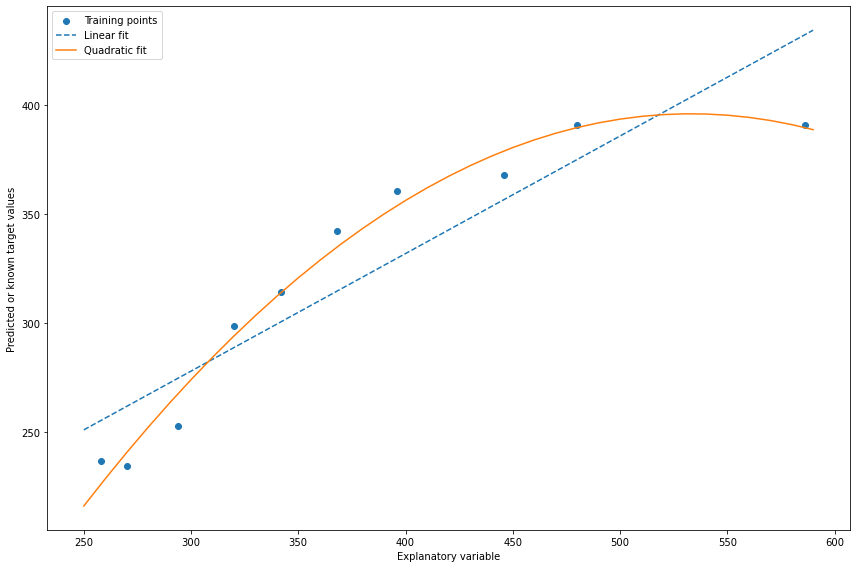

In [63]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

# 1. Adicione um termo polinomial de segundo grau:
from sklearn.preprocessing import PolynomialFeatures
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

# 2. Ajuste um modelo de regressão linear simples para comparação:

# 2.1 Ajustar para features lineares
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 2.2 Ajuste para features quadráticas
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# 3. Plotando os resultados:
plt.figure(figsize=(12,8))
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

No gráfico resultante acima, podemos ver que o ajuste polinomial captura a relação entre a resposta e as variáveis explicativas muito melhor do que o ajuste linear.

Em seguida, calcularemos as métricas de avaliação $\small  MSE$ e $\small  R^{2}$:

In [73]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

display(Latex('Training MSE Linear: %.3f $-$ Quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred))))
display(Latex("Training $\small R^2$ Linear: %.3f $-$ Quadratic: %.3f" % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Como você pode ver após a execução do código, o $\small MSE$ diminuiu de 570 (ajuste linear) para 61 (ajuste quadrático). Além disso, o coeficiente de determinação reflete um ajuste mais próximo do modelo quadrático ($\small R^{2}$ = 0.982) em oposição ao ajuste linear ($\small R^{2}$ = 0.832) neste problema fictício específico.

### Modelando relacionamentos não lineares no conjunto de dados *Housing*
Na subseção anterior, aprendemos como construir recursos polinomiais para ajustar relacionamentos não lineares em um problema fictício. Agora, vamos dar uma olhada em um exemplo mais concreto e aplicar esses conceitos aos dados no conjunto de dados *Housing*. Ao executar o código a seguir, vamos modelar a relação entre os *preços das casas* e *LSTAT* (porcentagem de status mais baixo da população) usando polinômios de segundo grau (quadrático) e terceiro grau (cúbico) e comparar isso com um ajuste linear:

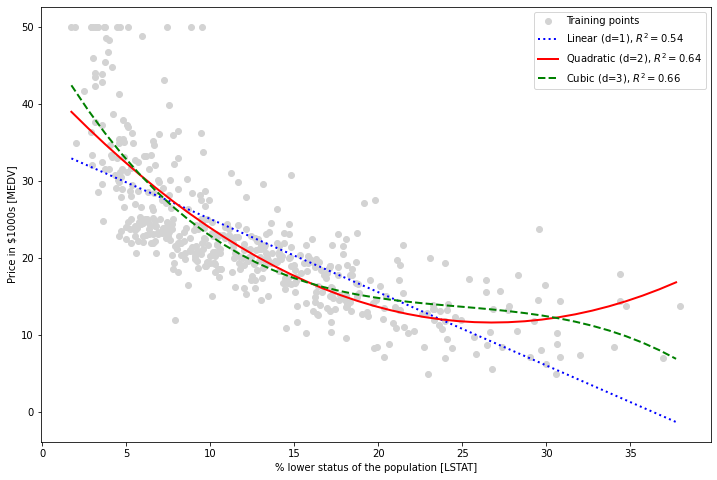

In [75]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# Criando Features Quadráticas Grau 2 e 3
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# Ajustando as features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# Plotando os resultados
plt.figure(figsize=(12,8))
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

Como você pode ver, o ajuste cúbico captura a relação entre os preços das casas e o *LSTAT* melhor do que o ajuste linear e quadrático. No entanto, você deve estar ciente de que adicionar mais e mais recursos polinomiais aumenta a complexidade de um modelo e, portanto, aumenta a chance de *overfitting*. Assim, na prática, é sempre recomendável avaliar o desempenho do modelo em um conjunto de dados de teste separado para estimar o desempenho da generalização. Além disso, os recursos polinomiais nem sempre são a melhor escolha para modelar relacionamentos não lineares.

Por exemplo, com alguma experiência ou intuição, apenas olhar para o gráfico de dispersão **MEDV-LSTAT** pode levar à hipótese de que uma transformação logarítmica da variável de recurso *LSTAT* e a raiz quadrada de *MEDV* podem projetar os dados em um espaço de recurso linear adequado para um ajuste de regressão linear. Por exemplo, minha percepção é que essa relação entre as duas variáveis parece bastante semelhante a uma função exponencial:
$$
f(x) = e^{-x}
$$

Como o logaritmo natural de uma função exponencial é uma linha reta, suponho que essa transformação logarítmica pode ser aplicada de maneira útil aqui:
$$
\log(f(x)) = -x
$$

Vamos testar essa hipótese executando esse código:



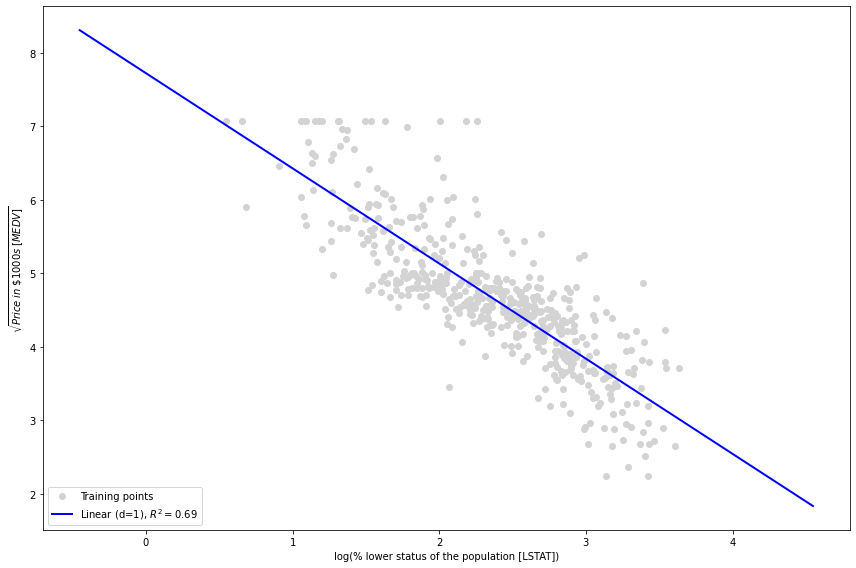

In [83]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# Transformando as Features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# Ajustando as Features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# Plotando os resultados
plt.figure(figsize=(12,8))
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Depois de transformar a variável explicativa no espaço logarítmico e tirar a raiz quadrada das variáveis alvo, conseguimos capturar a relação entre as duas variáveis com uma linha de regressão linear que parece se ajustar melhor aos dados ($\small R^{2} = 0.69$) do que qualquer uma das transformações de recursos polinomiais anteriores.

### Lidando com relacionamentos não lineares usando florestas aleatórias
Vamos dar uma olhada na regressão de floresta aleatória, que é conceitualmente diferente dos modelos de regressão anteriores. Uma floresta aleatória, que é um conjunto de árvores de decisão múltipla, pode ser entendida como a soma de funções lineares por partes, em contraste com os modelos globais de regressão linear e polinomial que discutimos anteriormente. Em outras palavras, por meio do algoritmo de árvore de decisão, subdividimos o espaço de entrada em regiões menores que se tornam mais gerenciáveis.

### Regressão da árvore de decisão
Uma vantagem do algoritmo de árvore de decisão é que ele não requer nenhuma transformação dos recursos se estivermos lidando com dados não lineares, porque as árvores de decisão analisam um recurso por vez, em vez de levar em consideração combinações ponderadas. (Da mesma forma, normalizar ou padronizar recursos não é necessário para árvores de decisão.)
Certamente você já desenvolveu uma árvore de decisão dividindo iterativamente seus nós até que as folhas sejam puras ou um critério de parada seja satisfeito. Quando usamos árvores de decisão para classificação, definimos entropia como uma medida de impureza para determinar qual divisão de recursos maximiza o ganho de informação ($\small IG$), que pode ser definido da seguinte forma para uma divisão binária:
$$
IG(D_{p},x_{i}) = I(D_{p}) - \dfrac{N_{left}}{N_{p}}I(D_{left}) - \dfrac{N_{right}}{N_{p}}I(D_{right})
$$

Aqui, $\small x_{i}$ é o recurso para executar a divisão: $\small N_{p}$ é o número de exemplos de treinamento no nó pai, $\small I$ é a função de impureza, $\small D_{p}$ é o subconjunto de exemplos de treinamento no nó pai e $\small D_{left}$ e $\small D_{right}$ são os subconjuntos de treinamento exemplos nos nós filho esquerdo e direito após a divisão. Lembre-se de que nosso objetivo é encontrar a divisão de recursos que maximize o ganho de informações; em outras palavras, queremos encontrar a divisão de recursos que mais reduz as impurezas nos nós filhos. Discutimos em outra oportunidade sobre a impureza e a entropia de Gini como medidas de impureza, que são critérios úteis para classificação.

Para usar uma árvore de decisão para regressão, no entanto, precisamos de uma métrica de impureza adequada para variáveis contínuas, então definimos a medida de impureza de um nó, $\small t$, como o $\small MSE$:

$$
I(t) = MSE(t) = \dfrac{1}{N_{t}}\sum_{i\in D_{t}}(y^{(i)}-\hat{y}_{t})^{2}
$$

Aqui, $\small N_{t}$ é o número de exemplos de treinamento no nó $\small t$, $\small D_{t}$ é o subconjunto de treinamento no nó $\small t$, $\small \hat{y}^{(i)}$ é o verdadeiro valor alvo e $\hat{y}_{t}$ é o valor alvo previsto (média da amostra):

$$
\hat{y} = \dfrac{1}{N_{t}}\sum_{i \in D_{t}}y^{(i)}
$$

No contexto da regressão da árvore de decisão, o $\small MSE$ é muitas vezes referido como variância dentro do nó, razão pela qual o critério de divisão também é mais conhecido como redução de variância. Para ver como é o ajuste de linha de uma árvore de decisão, vamos usar o `DecisionTreeRegressor` implementado no *scikit-learn* para modelar o relacionamento não linear entre as variáveis *MEDV* e *LSTAT*:

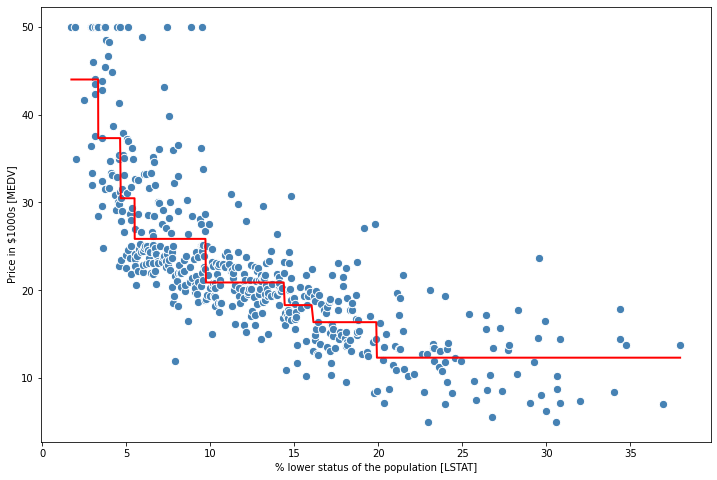

In [85]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

plt.figure(figsize=(12,8))
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

Como você pode ver no gráfico resultante, a árvore de decisão captura a tendência geral nos dados. No entanto, uma limitação desse modelo é que ele não captura a **continuidade** e a **diferenciabilidade da previsão desejada**. Além disso, precisamos ter cuidado ao escolher um valor apropriado para a profundidade da árvore para não **sobreajustar** ou **subajustar** os dados; aqui, uma profundidade de *três* parece ser uma boa escolha: